In [1]:
import numpy as np
import pandas as pd
import pydub
import sys
import os
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
from pydub import AudioSegment

In [4]:
music_folder = "/mnt/c/Users/Maxwell/Music/MusicAnalysis/"

In [5]:
def fft_features(x):
    f = np.fft.fft(x)
    f = f[2:int(f.size / 2 + 1)]
    f = abs(f)
    total_power = f.sum()
    f = np.array_split(f, 10)
    return [e.sum() / total_power for e in f]

In [6]:
def moments(x):
    mean = np.mean(x)
    std = np.std(x)
    skewness = stats.skew(x)
    kurtosis = stats.kurtosis(x)
    return [mean, std, skewness, kurtosis]

In [7]:
def other_stuff(song):
    amplitude = song.set_channels(1).get_array_of_samples()
    minute_length = len(amplitude_over_time)/sound_file.frame_rate/60    

In [8]:
def features(x):
    x = np.array(x)[:(len(x) - len(x) % 1000)] # truncate end so it rounds nicely
    
    f = []
    xs = x
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))
    
    xs = x.reshape(-1, 10).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))
    
    xs = x.reshape(-1, 100).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))
    
    xs = x.reshape(-1, 1000).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))
    
    f.extend(fft_features(x))
    return f

In [10]:
def compute_features(sound):
    amplitude = sound.set_channels(1).get_array_of_samples()
    return features(amplitude)

In [ ]:
start_indices = np.random.choice(np.random.randint(0, len(sound) - sample_length), n_samples, replace=0)

In [155]:
def generate_samples(sound, sample_length, n_samples):
    start_indices = np.random.choice(np.random.randint(0, len(sound) - sample_length), n_samples, replace=0)
    # create two random samples
    segments = [sound[start_index:start_index+sample_length] for start_index in start_indices]

    return segments

In [14]:
# Load all files into AudioSegments
#all_audio = []
song_stats = {}
song_segments = {}
for path, dirs, files in os.walk(music_folder):
    for f in files:
        #if not (f.endswith('.mp3') or f.endswith('.flac')):
        #    continue
        try:
            sound = AudioSegment.from_file(os.path.join(path, f), format=os.path.splitext(f)[1][1:])
        except pydub.exceptions.CouldntDecodeError:
            print("Couldn't decode {0}".format(f))
            continue
        except OSError:
            print('Uhhhh {0}'.format(f))
            continue
        # Do math on the audio segments
        song_stats[f] = compute_features(sound)
        
        if len(sound) < 60000:
            continue
        segment_a, segment_b = generate_samples(sound)
        song_segments[f] = (compute_features(segment_a), compute_features(segment_b))

Couldn't decode data.csv
Couldn't decode Folder.jpg
Couldn't decode cover.png
Couldn't decode 10 Songs.log
Couldn't decode folder.jpg
Couldn't decode I Hate Myself - 10 Songs.m3u
Couldn't decode AlbumArt_{F142730C-44D7-4A74-B348-C3D928BAB143}_Large.jpg
Couldn't decode Folder.jpg
Couldn't decode Thumbs.db
Couldn't decode AlbumArtSmall.jpg
Couldn't decode AlbumArt_{5522AC44-AB26-41EB-8983-796306E9C4FF}_Large.jpg
Couldn't decode AlbumArt_{5522AC44-AB26-41EB-8983-796306E9C4FF}_Small.jpg
Couldn't decode desktop.ini
Couldn't decode Folder.jpg
Couldn't decode Thumbs.db
Couldn't decode AlbumArtSmall.jpg
Couldn't decode AlbumArt_{579D865C-48E1-4EAD-9FF6-0B77D1FB81BC}_Large.jpg
Couldn't decode AlbumArt_{579D865C-48E1-4EAD-9FF6-0B77D1FB81BC}_Small.jpg
Couldn't decode AlbumArt_{7446C890-45D8-4188-92AD-3B5919C93D13}_Large.jpg
Couldn't decode AlbumArt_{7446C890-45D8-4188-92AD-3B5919C93D13}_Small.jpg
Couldn't decode desktop.ini
Couldn't decode Folder.jpg
Couldn't decode cover.jpg
Couldn't decode cove

In [15]:
all_features = [
    'amp1mean', 'amp1std', 'amp1skew', 'amp1kurt', 'amp1dmean', 'amp1dstd', 'amp1dskew', 'amp1dkurt', 'amp10mean', 'amp10std',
     'amp10skew', 'amp10kurt', 'amp10dmean', 'amp10dstd', 'amp10dskew', 'amp10dkurt', 'amp100mean', 'amp100std', 'amp100skew',
     'amp100kurt', 'amp100dmean', 'amp100dstd', 'amp100dskew', 'amp100dkurt', 'amp1000mean', 'amp1000std', 'amp1000skew',
     'amp1000kurt', 'amp1000dmean', 'amp1000dstd', 'amp1000dskew', 'amp1000dkurt', 'power1', 'power2', 'power3', 'power4',
     'power5', 'power6', 'power7', 'power8', 'power9', 'power10'
]

In [16]:
data = pd.DataFrame.from_dict(song_stats, orient='index')
data.columns = all_features

In [17]:
data.head()

,amp1mean,amp1std,amp1skew,amp1kurt,amp1dmean,amp1dstd,amp1dskew,amp1dkurt,amp10mean,amp10std,...,power1,power2,power3,power4,power5,power6,power7,power8,power9,power10
Sonic Youth-Goo-01-Dirty Boots.mp3,-14.265601,6628.869633,-0.037275,1.517844,-4.520690e-03,1480.440015,0.005109,17.899664,-14.265601,6224.603805,...,0.551537,0.151986,0.105571,0.077655,0.045715,0.035157,0.020906,0.009138,0.001571,0.000763
Sonic Youth-Goo-02-Tunic (Song For Karen).mp3,-22.844941,7522.734380,0.047206,0.652780,5.928737e-08,2099.899440,-0.032844,9.015669,-22.844941,6728.139954,...,0.464252,0.234542,0.098406,0.067231,0.050324,0.039618,0.027293,0.014258,0.003490,0.000586
Sonic Youth-Goo-03-Mary-christ.mp3,-48.358483,7464.059539,-0.019193,1.125212,-1.183292e-07,1837.490263,-0.033699,5.298988,-48.358483,6823.863113,...,0.518140,0.211970,0.087929,0.046193,0.046592,0.040115,0.027315,0.018126,0.002822,0.000798
Sonic Youth-Goo-04-Kool Thing.mp3,-63.116858,8265.464050,-0.017472,0.388447,-4.225367e-02,2311.823646,0.021183,9.632322,-63.116858,7645.262280,...,0.488884,0.167364,0.101069,0.075480,0.065670,0.051232,0.031007,0.015697,0.002746,0.000851
Sonic Youth-Goo-05-Mote.mp3,-78.511140,8026.549430,0.004304,0.487195,1.299435e-02,1859.717400,0.009469,5.486299,-78.511140,7218.139178,...,0.540133,0.235263,0.085854,0.041328,0.033875,0.028346,0.021410,0.011498,0.001652,0.000642


In [18]:
data.to_csv(music_folder + 'data.csv')

# Genetic Algorithm for Feature Selection

In [156]:
# gimme more samples
more_song_segments = {}
samples = 30
for path, dirs, files in os.walk(music_folder):
    for f in files:
        try:
            sound = AudioSegment.from_file(os.path.join(path, f), format=os.path.splitext(f)[1][1:])
        except pydub.exceptions.CouldntDecodeError:
            print("Couldn't decode {0}".format(f))
            continue
        except OSError:
            print('Uhhhh {0}'.format(f))
            continue
        # Do math on the audio segments
        if len(sound) < 60000:
            continue
        segments = generate_samples(sound, 30000, samples)
        more_song_segments[f] = [compute_features(segment) for segment in segments]

Couldn't decode data.csv
Couldn't decode feature_classification_data.csv
Couldn't decode Folder.jpg
Couldn't decode cover.png
Couldn't decode 10 Songs.log
Couldn't decode folder.jpg
Couldn't decode I Hate Myself - 10 Songs.m3u
Couldn't decode AlbumArt_{F142730C-44D7-4A74-B348-C3D928BAB143}_Large.jpg
Couldn't decode Folder.jpg
Couldn't decode Thumbs.db
Couldn't decode AlbumArtSmall.jpg
Couldn't decode AlbumArt_{5522AC44-AB26-41EB-8983-796306E9C4FF}_Large.jpg
Couldn't decode AlbumArt_{5522AC44-AB26-41EB-8983-796306E9C4FF}_Small.jpg
Couldn't decode desktop.ini
Couldn't decode Folder.jpg
Couldn't decode Thumbs.db
Couldn't decode AlbumArtSmall.jpg
Couldn't decode AlbumArt_{579D865C-48E1-4EAD-9FF6-0B77D1FB81BC}_Large.jpg
Couldn't decode AlbumArt_{579D865C-48E1-4EAD-9FF6-0B77D1FB81BC}_Small.jpg
Couldn't decode AlbumArt_{7446C890-45D8-4188-92AD-3B5919C93D13}_Large.jpg
Couldn't decode AlbumArt_{7446C890-45D8-4188-92AD-3B5919C93D13}_Small.jpg
Couldn't decode desktop.ini
Couldn't decode Folder.jp

In [163]:
feature_selection_df = pd.DataFrame(columns=all_features+['class'])
class_map = {}
i = 0
j = 0
for key, value in more_song_segments.items():
    class_map[j] = key
    for elt in value:
        feature_selection_df.loc[i] = elt+[j]
        i+=1
    j+=1

In [167]:
feature_selection_df.head()

,amp1mean,amp1std,amp1skew,amp1kurt,amp1dmean,amp1dstd,amp1dskew,amp1dkurt,amp10mean,amp10std,...,power2,power3,power4,power5,power6,power7,power8,power9,power10,class
0,-15.531398,7519.459646,-0.037774,0.350972,0.005647,1547.613119,-0.021632,16.228730,-15.531398,7153.066377,...,0.133386,0.089528,0.087123,0.051858,0.034294,0.020165,0.009310,0.001249,0.000541,0.0
1,-14.660321,7472.339039,-0.030883,0.327333,0.001646,1627.962044,-0.026250,20.290121,-14.660321,7088.929359,...,0.131145,0.090349,0.091485,0.055442,0.038567,0.020920,0.008798,0.001049,0.000429,0.0
2,-8.345457,3569.817322,-0.187567,4.769926,0.009899,396.510121,-0.064878,7.437354,-8.345457,3456.160081,...,0.140013,0.035886,0.014835,0.013491,0.015471,0.018819,0.017547,0.002360,0.000677,0.0
3,-10.698355,7614.138899,-0.009111,0.397390,-0.061838,1398.906774,0.024467,26.332339,-10.698355,7249.887586,...,0.152820,0.093850,0.069216,0.044880,0.028719,0.016903,0.006089,0.001016,0.000696,0.0
4,-16.356513,6053.269703,-0.018879,0.949063,-0.000316,819.748305,0.032413,18.367390,-16.356513,5830.159054,...,0.151394,0.070955,0.039751,0.028768,0.020315,0.015891,0.010254,0.001290,0.000216,0.0


In [165]:
feature_selection_df.to_csv(music_folder + 'feature_classification_data.csv')

#### GA

In [172]:
train_data = feature_selection_df[:180]

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
# crossover
def crossover(chromosome_1, chromosome_2):
    #unzip = np.random.randint(0, feature_flag_count)
    unzip = len(chromosome_1)//2
    child = np.zeros(feature_flag_count)
    child[:unzip] = chromosome_1[:unzip]
    child[unzip:] = chromosome_2[unzip:]
    return child

# mutate
def mutate_chromosome(chromosome, mutation_rate):
    # determine which bits will be flipped
    mutate_feature = np.random.binomial(n=1, p=mutation_rate, size=feature_flag_count)
    mutated = np.logical_xor(chromosome, mutate_feature) # XOR to flip features
    return mutated    

# evaluate chromosome fitness
def fitness(chromosome):
    # chromosome is a boolean array
    classifier = KNeighborsClassifier(n_neighbors=5)
    features = train_data.columns[chromosome]
    output = train_data['class']
    
    fit_classifier = classifier.fit(train_data[features], output)
    accuracy = fit_classifier.score(train_data[features], output)
    return len(chromosome)*accuracy - np.sum(chromosome)

def grade(population):
    all_grade = np.array([fitness(population[i, :]) for i in range(len(population))])
    return np.mean(all_grade)

def gen_population(N, features):
    return np.random.binomial(n=1, p=0.5, size=(N, features))

In [212]:
def evolve(pop, retain_rate=0.20, mutation_rate=0.05, lucky_rate=0.02):
    graded = [(fitness(population[i, :]), population[i, :]) for i in range(len(population))]
    graded = [member[1] for member in graded]
    
    retain_length = int(len(graded) * retain_rate)
    parents = graded[:retain_length]
    
    for member in graded[retain_length:]:
        if lucky_rate > np.random.rand():
            parents.append(member)
            
    parents_count = len(parents)
    desired_children = len(pop) - parents_count
    children = []
    while len(children) < desired_children:
        mom = np.random.randint(0, parents_count-1)
        dad = np.random.randint(0, parents_count-1)
        if mom != dad:
            mom = parents[mom]
            dad = parents[dad]
            child = crossover(mom, dad)
            if mutation_rate > np.random.rand():
                child = mutate_chromosome(child, mutation_rate)
            children.append(child)
            
    parents.extend(children)
    return np.array(parents).astype(int)

In [213]:
# run genetic algorithm
# generate random population
# chromosomes as binary lists, flags for turn feature on or off? yes! solves crossover problem
N = 1000
mutation_rate = 0.05
lucky_rate = 0.02
retain_rate = 0.20
accuracy=0.000001

feature_flag_count = len(all_features)
p = gen_population(N, feature_flag_count)

In [214]:
last_grade = 0
current_grade = grade(population)
fitness_history = []

generation = 0
while np.abs(last_grade - current_grade) > accuracy:
    last_grade = grade(p)
    p = evolve(p, retain_rate=retain_rate, mutation_rate=mutation_rate, lucky_rate=lucky_rate)
    current_grade = grade(p)
    
    fitness_history.append(current_grade)
    
    generation += 1
    print('Generation: {0}, Fitness:{1}'.format(generation, current_grade))

Generation: 1, Fitness:9.070466666666665
Generation: 2, Fitness:9.387066666666666
Generation: 3, Fitness:9.260166666666667
Generation: 4, Fitness:9.288966666666663
Generation: 5, Fitness:9.0112
Generation: 6, Fitness:9.400233333333334
Generation: 7, Fitness:8.946200000000001
Generation: 8, Fitness:9.358266666666667
Generation: 9, Fitness:9.275833333333333
Generation: 10, Fitness:9.299166666666666
Generation: 11, Fitness:9.166566666666666
Generation: 12, Fitness:9.0763
Generation: 13, Fitness:9.1931
Generation: 14, Fitness:9.383999999999999
Generation: 15, Fitness:9.1357
Generation: 16, Fitness:9.238966666666666
Generation: 17, Fitness:9.267766666666667
Generation: 18, Fitness:9.258
Generation: 19, Fitness:9.352533333333334
Generation: 20, Fitness:9.382666666666664
Generation: 21, Fitness:9.169433333333332
Generation: 22, Fitness:9.102366666666667
Generation: 23, Fitness:9.402433333333333
Generation: 24, Fitness:9.560366666666665
Generation: 25, Fitness:9.2183
Generation: 26, Fitness:9.

Generation: 203, Fitness:9.270599999999998
Generation: 204, Fitness:9.117033333333334
Generation: 205, Fitness:9.4395
Generation: 206, Fitness:9.148933333333332
Generation: 207, Fitness:9.438199999999998
Generation: 208, Fitness:9.492166666666666
Generation: 209, Fitness:9.631333333333332
Generation: 210, Fitness:9.289599999999998
Generation: 211, Fitness:9.052233333333334
Generation: 212, Fitness:9.253566666666666
Generation: 213, Fitness:9.217066666666666
Generation: 214, Fitness:9.348966666666668
Generation: 215, Fitness:9.154466666666668
Generation: 216, Fitness:9.300766666666664
Generation: 217, Fitness:9.442066666666665
Generation: 218, Fitness:9.419499999999998
Generation: 219, Fitness:9.161433333333333
Generation: 220, Fitness:9.211199999999998
Generation: 221, Fitness:9.3894
Generation: 222, Fitness:9.095633333333332
Generation: 223, Fitness:9.340733333333334
Generation: 224, Fitness:9.201733333333332
Generation: 225, Fitness:9.371233333333333
Generation: 226, Fitness:9.387233

Generation: 403, Fitness:9.368266666666667
Generation: 404, Fitness:9.060566666666666
Generation: 405, Fitness:9.194333333333333
Generation: 406, Fitness:9.0027
Generation: 407, Fitness:9.063666666666668
Generation: 408, Fitness:9.258199999999999
Generation: 409, Fitness:9.2313
Generation: 410, Fitness:9.345366666666665
Generation: 411, Fitness:9.3365
Generation: 412, Fitness:9.180133333333334
Generation: 413, Fitness:9.156666666666666
Generation: 414, Fitness:9.355333333333332
Generation: 415, Fitness:9.096166666666665
Generation: 416, Fitness:9.428266666666664
Generation: 417, Fitness:9.092899999999998
Generation: 418, Fitness:9.318033333333332
Generation: 419, Fitness:9.301866666666665
Generation: 420, Fitness:9.297533333333332
Generation: 421, Fitness:9.210799999999999
Generation: 422, Fitness:9.235433333333333
Generation: 423, Fitness:9.3535
Generation: 424, Fitness:9.466766666666667
Generation: 425, Fitness:9.173633333333331
Generation: 426, Fitness:8.937
Generation: 427, Fitness

Generation: 603, Fitness:9.2883
Generation: 604, Fitness:9.230033333333333
Generation: 605, Fitness:9.215333333333332
Generation: 606, Fitness:9.467433333333332
Generation: 607, Fitness:9.432699999999999
Generation: 608, Fitness:9.231266666666667
Generation: 609, Fitness:9.12213333333333
Generation: 610, Fitness:9.471466666666668
Generation: 611, Fitness:9.2896
Generation: 612, Fitness:9.301666666666666
Generation: 613, Fitness:9.126399999999999
Generation: 614, Fitness:9.474533333333333
Generation: 615, Fitness:9.268533333333332
Generation: 616, Fitness:9.219699999999998
Generation: 617, Fitness:9.390333333333333
Generation: 618, Fitness:9.280266666666666
Generation: 619, Fitness:9.303433333333333
Generation: 620, Fitness:9.716133333333332
Generation: 621, Fitness:9.080966666666667
Generation: 622, Fitness:9.359666666666664
Generation: 623, Fitness:9.2714
Generation: 624, Fitness:9.448933333333331
Generation: 625, Fitness:9.3875
Generation: 626, Fitness:9.509333333333334
Generation: 6

KeyboardInterrupt: 

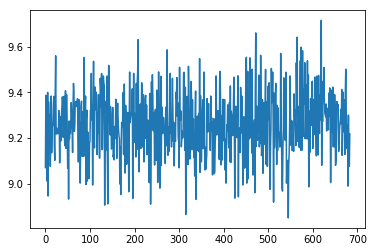

In [215]:
plt.plot(fitness_history)

In [181]:
graded = [(fitness(p[i, :]), p[i, :]) for i in range(len(p))]
graded = [member[1] for member in graded]

In [183]:
graded[0]

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

# Cluster Stuff

In [241]:
from sklearn.preprocessing import StandardScaler

In [236]:
# Don't even think the clustering is necessary - can just look at principal components for plotting
# Need optimal features

In [484]:
X = StandardScaler().fit_transform(data[
    ['amp10mean', 'amp10std', 'amp10skew', 'amp10kurt', 'amp1000mean',
     'amp1000std', 'amp1000skew', 'amp1000kurt', 'power1', 'power3', 'power10']
].values)

In [485]:
fit_model = cluster_model.fit(X)

In [486]:
core_samples_mask = np.zeros_like(fit_model.labels_, dtype=bool)
core_samples_mask[fit_model.core_sample_indices_] = True
labels = fit_model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

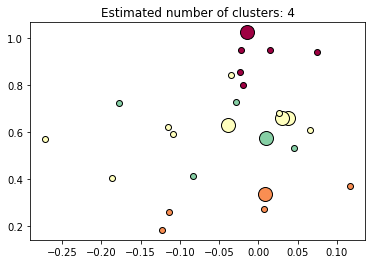

In [487]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        #col = [0, 0, 0, 1]
        continue
    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [357]:
from sklearn.decomposition import PCA

In [375]:
pca = PCA(n_components=3)

In [376]:
X = StandardScaler().fit_transform(data.values)

In [377]:
fit_PCA = pca.fit_transform(X)

In [378]:
X = StandardScaler().fit_transform(fit_PCA)

In [419]:
squashed = X[((X[:, 0] < 4)&(X[:,1]<4)&(X[:,2]<4))]

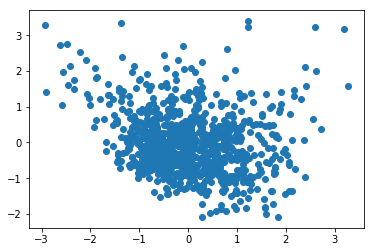

In [420]:
plt.scatter(squashed[:, 0], squashed[:, 1]);

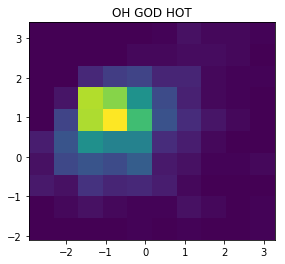

In [421]:
heatmap, xedges, yedges = np.histogram2d(x=squashed[:, 0], y=squashed[:, 1])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.title('OH GOD HOT')
plt.imshow(heatmap, extent=extent);

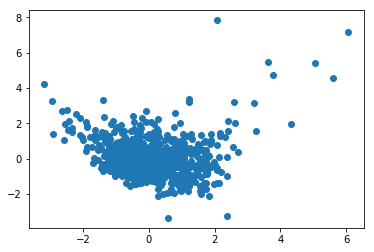

In [422]:
plt.scatter(X[:, 0], X[:, 1]);

In [370]:
from mpl_toolkits.mplot3d import Axes3D

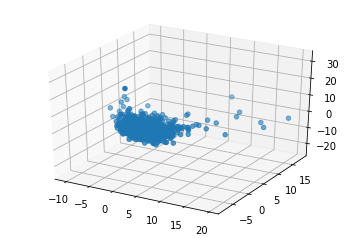

In [371]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax, xs=fit_PCA[:, 0], ys=fit_PCA[:, 1], zs=fit_PCA[:, 2]);

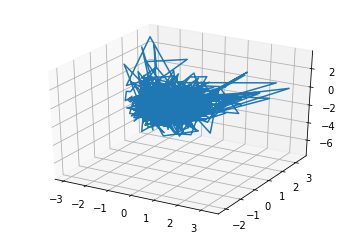

In [429]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.plot_wireframe(ax, X=squashed[:, 0], Y=squashed[:, 1], Z=squashed[:, 2]);

In [ ]:
# Generate hexagonal points


#### Clustering

In [521]:
from sklearn.cluster import DBSCAN, KMeans
cluster_model = DBSCAN()
neighbors_model = KMeans(n_clusters=5)

In [522]:
neighbors_data = neighbors_model.fit(X)

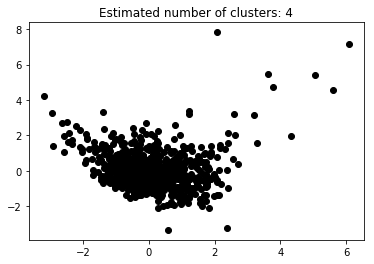

In [475]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
        #continue
    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [490]:
X = StandardScaler().fit_transform(data[['amp10mean', 'amp10std', 'amp10skew', 'amp10kurt', 'amp1000mean',
     'amp1000std', 'amp1000skew', 'amp1000kurt', 'power1', 'power3', 'power10']].values)

In [509]:
db_cluster = DBSCAN(eps=0.5, min_samples=2).fit(X)

In [510]:
core_samples_mask = np.zeros_like(fit_model.labels_, dtype=bool)
core_samples_mask[fit_model.core_sample_indices_] = True
labels = fit_model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

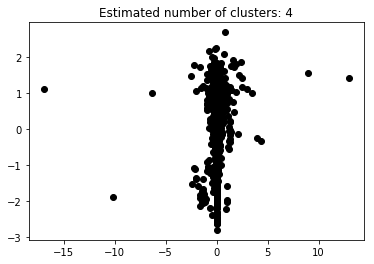

In [511]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
        #continue
    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [518]:
set(neighbors_data.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [460]:
# t-sne embedding
from sklearn.manifold import TSNE

In [461]:
stoch_neighbors = TSNE()
stoch_data = stoch_neighbors.fit_transform(X)

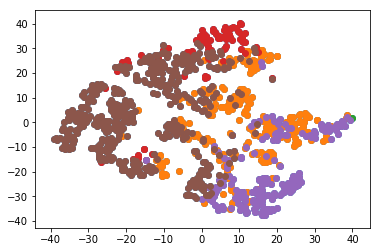

In [523]:
plt.scatter(stoch_data[:, 0], stoch_data[:,1])
#plt.scatter(stoch_data[db_cluster.labels_ > -1, 0], stoch_data[db_cluster.labels_ > -1, 1]);
plt.scatter(stoch_data[neighbors_data.labels_==0, 0], stoch_data[neighbors_data.labels_ ==0, 1]);
plt.scatter(stoch_data[neighbors_data.labels_==1, 0], stoch_data[neighbors_data.labels_ ==1, 1]);
plt.scatter(stoch_data[neighbors_data.labels_==2, 0], stoch_data[neighbors_data.labels_ ==2, 1]);
plt.scatter(stoch_data[neighbors_data.labels_==3, 0], stoch_data[neighbors_data.labels_ ==3, 1]);
plt.scatter(stoch_data[neighbors_data.labels_==4, 0], stoch_data[neighbors_data.labels_ ==4, 1]);

### tinkering

In [123]:
sound_file = AudioSegment.from_file(music_folder + "Avalanches - Since I Left You/" + "The Avalanches - Since I Left You - 01 - Since I Left You.mp3", format='mp3')

In [124]:
amplitude = sound_file.set_channels(1).get_array_of_samples()

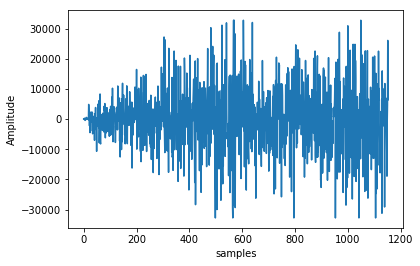

In [133]:
plt.plot(amplitude[0:len(amplitude):10000])
plt.ylabel('Amplitude')
plt.xlabel('samples');

In [149]:
sound_file[0:60000].set_channels(1)

In [150]:
type(sound_file[0:60000])

pydub.audio_segment.AudioSegment

In [144]:
len(sound_file)/1000/60

4.351133333333333

In [135]:
len(amplitude)/1000/60

191.88479999999998

In [136]:
num_chunks = 400
chunk_size = int(len(sound_file) / num_chunks)

In [137]:
loudness_over_time = []
for i in range(0, len(sound_file), chunk_size):
    chunk = sound_file[i:i+chunk_size]
    loudness_over_time.append(chunk)

ValueError: setting an array element with a sequence.

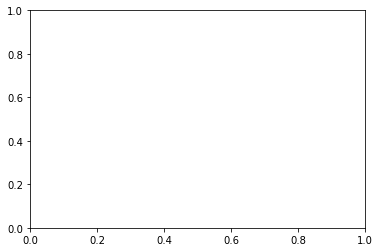

In [138]:
plt.plot(loudness_over_time)

# Build Model

# Train Model

# Generate Songs

# Turn Songs Into Audio Files